# Alpha Decay Project
By Nicolas Harvie

See README for project description

In [1]:
import pandas as pd
import pandas_datareader as pdr
import numpy as np
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

***
## Setup

In [2]:
# Predictors from Chen & Zimmerman (2020)
LS = pd.read_csv('../data/chen_predictors.csv')
LS['date'] = pd.to_datetime(LS['date'])
LS = LS.set_index(LS['date'],drop=True)
LS = LS.drop(columns={'date'})

# Get the Same Index as the FF data by changing the time period 
LS.index = LS.reset_index()['date'].dt.to_period('M')

In [3]:
# Visualizing the LS portfolios
LS

,AbnormalAccruals,Accruals,AccrualsBM,Activism1,Activism2,AdExp,AgeIPO,AM,AnalystRevision,AnalystValue,...,TrendFactor,UpRecomm,VarCF,VolMkt,VolSD,VolumeTrend,XFIN,zerotrade,zerotradeAlt1,zerotradeAlt12
date,,,,,,,,,,,,,,,,,,,,,
1926-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1926-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1926-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.738352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1926-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.261467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1926-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.241152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08,3.784670,-0.210101,-1.471152,NaN,NaN,-3.033555,4.107438,0.296566,-0.072379,-0.884276,...,-0.320075,-1.663644,-2.343303,-0.072478,0.137467,-0.020853,-2.072839,-0.872973,0.163327,0.589541
2021-09,-2.391034,3.270900,5.949122,NaN,NaN,1.110608,-3.731948,6.966857,0.543430,2.903650,...,1.898829,-0.586554,-3.540795,2.466974,-0.545706,0.919953,5.592241,1.658765,1.025331,-0.034438
2021-10,-2.094180,-0.976106,1.375931,NaN,NaN,-4.619797,-2.245221,0.135418,1.219328,4.942232,...,1.014887,0.072944,5.073739,0.857542,-2.704861,1.406361,7.749070,-3.089066,-4.030387,-2.898246


In [4]:
# Signal Documentation from CZ
signal_doc = pd.read_csv('../data/signal_doc.csv')

# Have a DF with all the ending and starting dates for the studies
study_dates = signal_doc[['Acronym', 'SampleStartYear', 'SampleEndYear', 'Year']]
study_dates['Year'] = pd.to_datetime(study_dates['Year'].astype(str)).dt.to_period('M')
study_dates['Start'] = pd.to_datetime(study_dates['SampleStartYear'].astype(str)).dt.to_period('M')
study_dates['End'] = pd.to_datetime(study_dates['SampleEndYear'].astype(str)).dt.to_period('M')
study_dates = study_dates.set_index('Acronym')
study_dates['End'] = study_dates['End'] + 11
study_dates

,SampleStartYear,SampleEndYear,Year,Start,End
Acronym,,,,,
AbnormalAccruals,1971,1992,2001-01,1971-01,1992-12
Accruals,1962,1991,1996-01,1962-01,1991-12
AccrualsBM,1980,1998,2004-01,1980-01,1998-12
Activism1,1990,2001,2005-01,1990-01,2001-12
AM,1963,1990,1992-01,1963-01,1990-12
...,...,...,...,...,...
SP_q,1979,1991,1996-01,1979-01,1991-12
tang_q,1973,2001,2009-01,1973-01,2001-12
Tax_q,1973,2000,2004-01,1973-01,2000-12


***
## Core 

In [5]:
# Preparing the rolling alpha dataframe
rolling_alpha_df = pd.DataFrame(index=LS.index,  columns=LS.columns)

In [6]:
###=== ROLLING ALPHA REGRESSION FOR CZ PREDICTORS ===###
def rolling_alpha_regression(factor):
    """Computes a rolling least square estimation for alpha to determine decay in significance of
    various predictors

    Parameters:
    factor (df): The exceeding returns dataframe of the factors
    """
    factor_df = pd.DataFrame(LS[factor]).dropna()

    # Slicing the DF according to date
    # Corresponds to our "in sample alpha"
    # starting_period = factor.index.min()
    ending_period = factor_df.index.min() + 1 

    while ending_period <= factor_df.index.max():
        
        # New factor with adequate date range index
        new_date_factor = factor_df[(factor_df.index <= ending_period)]
        # Setting the variables 
        Y = new_date_factor.iloc[:,-1]
        
        # Doing the Regression
        reg = smf.ols('Y ~ 1',data=new_date_factor).fit()
        
        # Appending the t_values for our new date range
        rolling_alpha_df.at[ending_period, factor] = reg.tvalues[0]
        
        # Incrementing the ending period 
        ending_period += 1 

In [10]:
# Computing rolling alpha on all our predictors 
# Can be specified to some factors rather than the full sample
# Compute time for full sample: ~ 2min
# for factor in rolling_alpha_df:
#     rolling_alpha_regression(factor)
rolling_alpha_df = pd.read_csv('../data/rolling_alpha_default.csv', parse_dates=['date'], index_col='date')

In [14]:
###=== PLOTTING ROLLING SIGNIFICATIVITY FOR FACTORS===### 
def plot_rolling_alpha(factor):

    factor_df = pd.DataFrame(rolling_alpha_df[factor]).dropna()
    #factor_df.index = factor_df.index.to_timestamp()

    
    # Define dates for horizontal lines
    IS = study_dates.at[factor, 'Start']
    OOS =  study_dates.at[factor, 'End']
    publication = study_dates.at[factor, 'Year']

    # Plot time series with horizontal lines
    fig, ax = plt.subplots(figsize=(20,10))
    
    ax.plot(factor_df.index, factor_df.values, label='Alpha')
    
    ax.axvline(IS, linestyle='--', color='r', label='In-Sample Starts')
    ax.axvline(OOS, linestyle='--', color='g', label='Out-of-Sample Starts')
    ax.axvline(publication, linestyle='--', color='b', label='Publication')
    ax.legend(loc='upper left')
    
    ax.set_title(f'Rolling Alpha for {factor}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Alpha')
    ax.legend()
    plt.show()

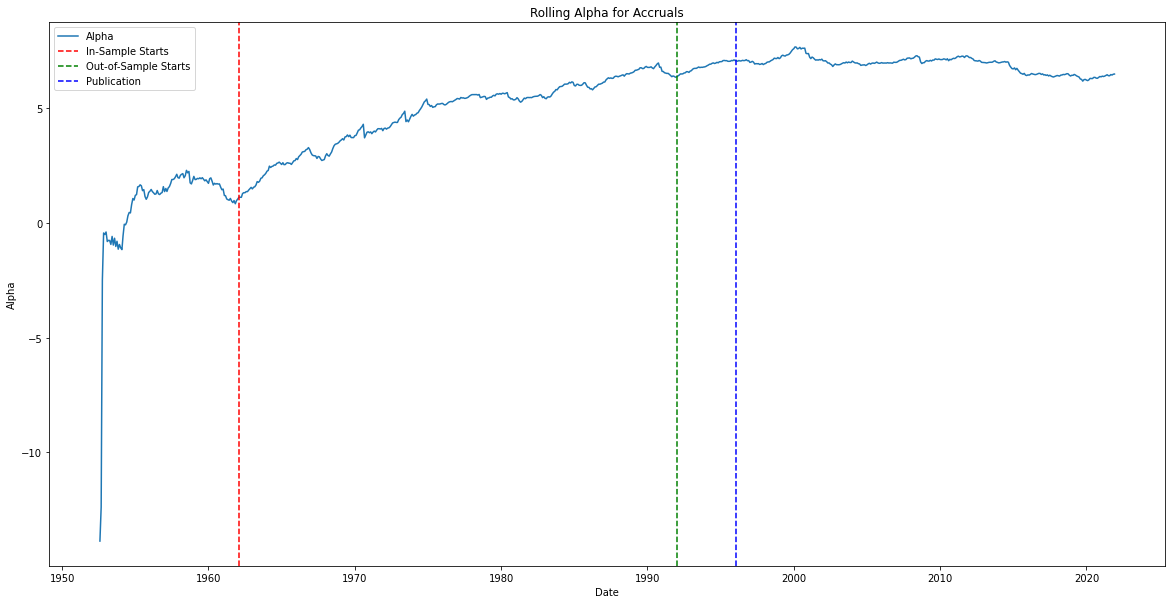

In [15]:
# An example rolling t-statistics plot 
plot_rolling_alpha('Accruals')

In [ ]:
# To plot all of them (not recommended)
# for factor in LS.columns:
#     plot_rolling_alpha(factor)

***
## Significance by Status 

In [16]:
state_alpha_df = pd.DataFrame(index=LS.columns, columns = ['OOS_Prepublication', 'In-Sample', 'OOS_Postpublication' , 'Total', 'Recent'])

In [17]:
def state_alpha(factor):
    
    factor_df = pd.DataFrame(LS[factor]).dropna()

    IS = study_dates.at[factor, 'Start']
    OOS =  study_dates.at[factor, 'End']
    publication = study_dates.at[factor, 'Year']

    # OUT OF SAMPLE PRE-PUBLICATION
    oos_prepublication = factor_df[(factor_df.index <= IS) | ((factor_df.index > OOS) & (factor_df.index < publication))]
    Y = oos_prepublication.iloc[:,-1]
    reg_oos_prepublication = smf.ols('Y ~ 1',data=Y).fit()
    state_alpha_df.at[factor, 'OOS_Prepublication']  = reg_oos_prepublication.tvalues[0]

    # OUT OF SAMPLE POST-PUBLICATION
    oos_postpublication = factor_df[(factor_df.index >= publication)]
    Z = oos_postpublication.iloc[:,-1]
    reg_oos_postpublication = smf.ols('Z ~ 1',data=Z).fit()
    state_alpha_df.at[factor, 'OOS_Postpublication']  = reg_oos_postpublication.tvalues[0]

    # IN-SAMPLE
    in_sample = factor_df[(factor_df.index >= IS) & (factor_df.index <= OOS)]
    I = in_sample.iloc[:,-1]
    reg_in_sample = smf.ols('I ~ 1',data=I).fit()
    state_alpha_df.at[factor, 'In-Sample']  = reg_in_sample.tvalues[0]

    # TOTAL
    total = factor_df
    T = total.iloc[:,-1]
    reg_total = smf.ols('T ~ 1',data=T).fit()
    state_alpha_df.at[factor, 'Total']  = reg_total.tvalues[0]

    # LAST 10 YEARS
    last = factor_df[factor_df.index >= '2015-01']
    L = last.iloc[:,-1]
    reg_L = smf.ols('L ~ 1',data=L).fit()
    state_alpha_df.at[factor, 'Recent']  = reg_L.tvalues[0]


    


In [18]:
for factor in state_alpha_df.index:
    try:
        state_alpha(factor)
    except:
        continue

In [19]:
state_alpha_df

,OOS_Prepublication,In-Sample,OOS_Postpublication,Total,Recent
AbnormalAccruals,0.166166,4.923601,-0.641559,2.066303,-0.480792
Accruals,2.699873,6.703207,1.416667,6.498143,0.335845
AccrualsBM,3.636836,4.858983,3.236132,6.575799,1.284082
Activism1,0.067551,1.003179,-0.696435,0.767474,NaN
Activism2,1.351775,1.024277,1.098671,1.763319,NaN
...,...,...,...,...,...
VolumeTrend,3.122768,2.892558,4.776236,5.34621,1.52565
XFIN,1.162896,4.856907,2.437773,5.146799,1.455238
zerotrade,2.143264,2.629101,0.398625,3.088749,-0.303629
zerotradeAlt1,1.897413,3.795222,0.572212,3.545136,0.047733


In [20]:
state_alpha_df.mean()

OOS_Prepublication     1.738661
In-Sample              3.945476
OOS_Postpublication    1.283986
Total                  4.113804
Recent                 0.548985
dtype: object

In [21]:
state_alpha_df[(state_alpha_df['In-Sample'] >= 3) & (state_alpha_df['OOS_Postpublication'] <= 3)]

,OOS_Prepublication,In-Sample,OOS_Postpublication,Total,Recent
AbnormalAccruals,0.166166,4.923601,-0.641559,2.066303,-0.480792
Accruals,2.699873,6.703207,1.416667,6.498143,0.335845
AdExp,0.347788,3.147344,2.346503,2.722398,0.383489
AM,0.648296,3.490413,1.87619,3.420589,0.370443
AssetGrowth,0.700706,7.641781,2.122858,7.323823,0.851718
...,...,...,...,...,...
tang,0.251618,3.63859,0.413796,2.862791,-0.202331
TrendFactor,4.667931,13.416872,0.505648,13.883796,0.422568
UpRecomm,5.500012,4.589652,2.390246,5.524881,1.010077
XFIN,1.162896,4.856907,2.437773,5.146799,1.455238


In [22]:
state_alpha_df[state_alpha_df['OOS_Postpublication'] >= 3]

,OOS_Prepublication,In-Sample,OOS_Postpublication,Total,Recent
AccrualsBM,3.636836,4.858983,3.236132,6.575799,1.284082
AnalystRevision,4.41063,5.133362,7.137011,9.003402,0.338178
AnnouncementReturn,4.270488,13.359539,9.511861,14.438574,2.869721
BM,-0.152499,3.778493,4.426531,5.324414,0.919936
BMdec,1.393395,5.335181,3.543743,6.318903,0.166139
DivYieldST,4.457285,4.232452,7.693695,9.182059,-0.036885
DownRecomm,3.770544,5.514504,3.367685,6.151414,1.065687
EarningsStreak,2.256475,10.689348,3.824523,10.435265,2.722552
EarningsSurprise,7.522462,4.842764,4.654096,9.262869,-0.668476
ExchSwitch,2.466517,2.887487,3.86175,5.190641,2.161077


In [23]:
# for factor in state_alpha_df[state_alpha_df['OOS_Postpublication'] >= 3].index:
#     plot_rolling_alpha(factor)

In [25]:
state_alpha_df[state_alpha_df['Recent'] >= 1.96]

,OOS_Prepublication,In-Sample,OOS_Postpublication,Total,Recent
AnnouncementReturn,4.270488,13.359539,9.511861,14.438574,2.869721
ChNWC,4.114755,2.651487,0.180976,4.452069,2.603684
ConvDebt,1.596532,4.310947,1.64676,4.32641,2.045568
DivOmit,2.500144,3.036882,2.537964,4.301561,2.311053
EarningsStreak,2.256475,10.689348,3.824523,10.435265,2.722552
ExchSwitch,2.466517,2.887487,3.86175,5.190641,2.161077
FirmAgeMom,4.264485,5.395397,3.849612,7.498893,3.044779
GP,2.449253,2.391319,2.271226,3.865699,2.109915
OperProfRD,2.042668,1.858331,1.621075,2.52866,2.08108
OrderBacklogChg,-0.309308,2.381457,2.301212,2.710235,2.144244


In [ ]:
# for factor in state_alpha_df[state_alpha_df['Recent'] >= 3.00].index:
#     plot_rolling_alpha(factor)

In [30]:
good_recent = pd.merge(signal_doc[['Acronym', 'Authors', 'Year']], state_alpha_df[state_alpha_df['Recent'] >= 1.96][['Recent']], left_on='Acronym', right_index=True)
good_recent

,Acronym,Authors,Year,Recent
6,AnnouncementReturn,"Chan, Jegadeesh and Lakonishok",1996,2.869721
28,ChNWC,Soliman,2008,2.603684
33,ConvDebt,Valta,2016,2.045568
45,DivOmit,"Michaely, Thaler and Womack",1995,2.311053
52,EarningsStreak,Loh and Warachka,2012,2.722552
59,ExchSwitch,Dharan and Ikenberry,1995,2.161077
63,FirmAgeMom,Zhang,2004,3.044779
67,GP,Novy-Marx,2013,2.109915
118,OrderBacklogChg,Baik and Ahn,2007,2.144244
124,PctTotAcc,"Hafzalla, Lundholm, Van Winkle",2011,2.069039
